<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [287]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [288]:
data = pd.read_csv('asset_price_data.csv')
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  770 non-null    float64
 2   Asset2  770 non-null    float64
 3   Asset3  770 non-null    float64
 4   Asset4  734 non-null    float64
 5   Asset5  763 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [289]:
df.columns = [column.lower() for column in df.columns] #converting to lower case

In [290]:
df.eq(" ").sum() #no empty strings

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [291]:
df.duplicated().sum() #no duplications

0

In [292]:
df.isnull().sum() # many NAN values

date       0
asset1    13
asset2    13
asset3    13
asset4    49
asset5    20
dtype: int64

In [293]:
df_clean = df.fillna(method='ffill')# forward fill of NAN values. If the price didn't change, then the price of the day before is still valid

In [294]:
df_clean.isnull().sum() #no null values anymore

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

# Visualising the current data

In [295]:
df = df_clean
df["date"] = pd.to_datetime(df.date)
df.dtypes

date      datetime64[ns]
asset1           float64
asset2           float64
asset3           float64
asset4           float64
asset5           float64
dtype: object

In [296]:
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   asset1  783 non-null    float64
 1   asset2  783 non-null    float64
 2   asset3  783 non-null    float64
 3   asset4  783 non-null    float64
 4   asset5  783 non-null    float64
dtypes: float64(5)
memory usage: 36.7 KB


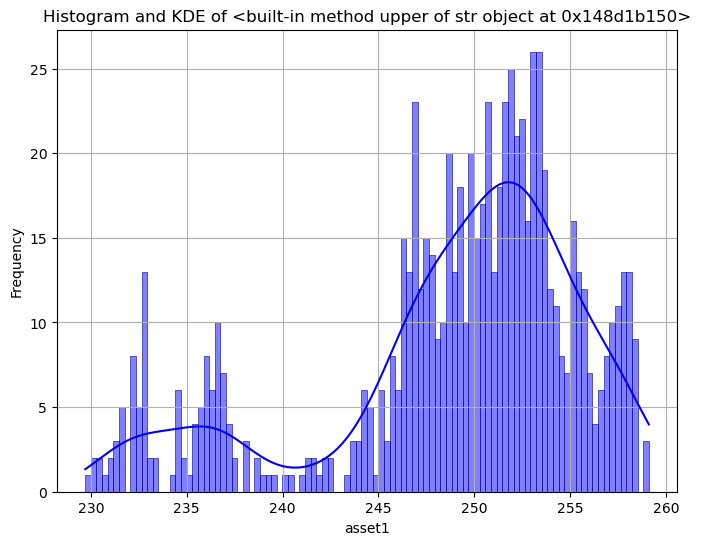

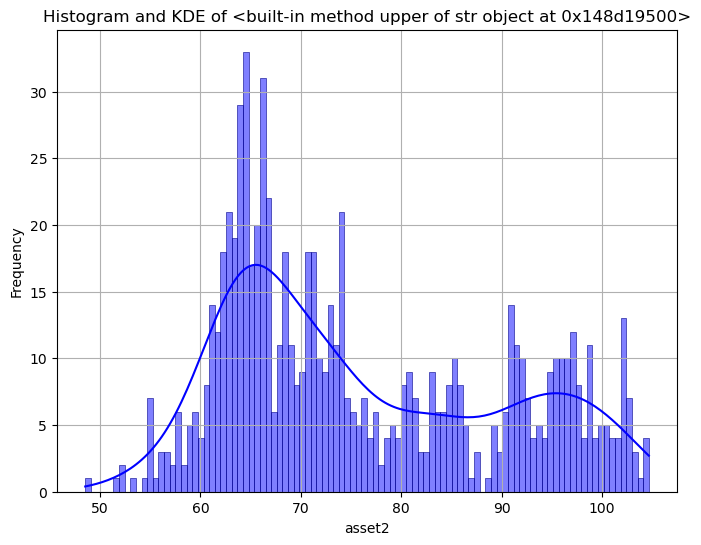

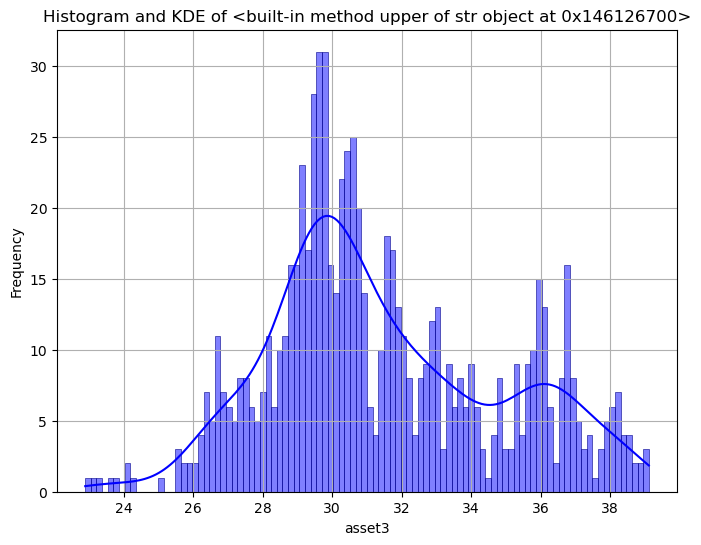

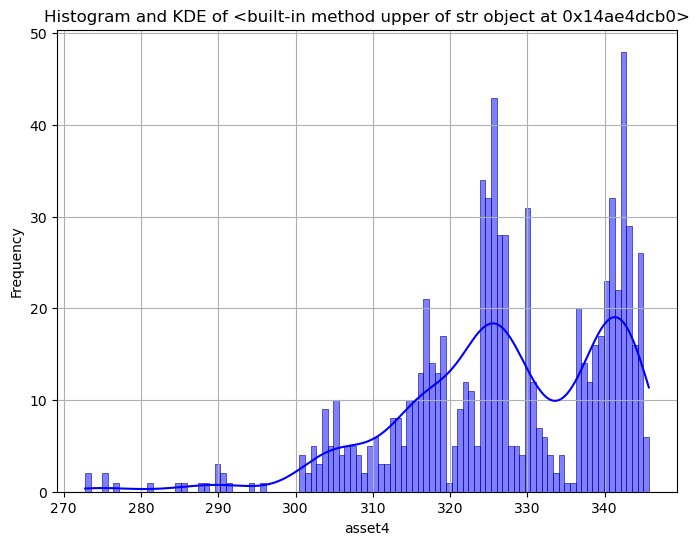

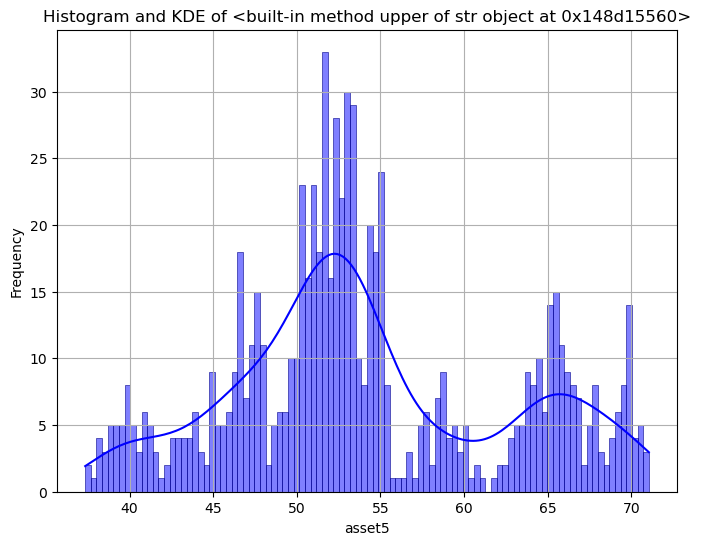

In [297]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=100, kde=True, color='blue', edgecolor='darkblue')
    plt.title(f'Histogram and KDE of {col.upper}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)  # Optional: adds a grid for easier reading
    plt.show()

<Figure size 2000x3000 with 0 Axes>

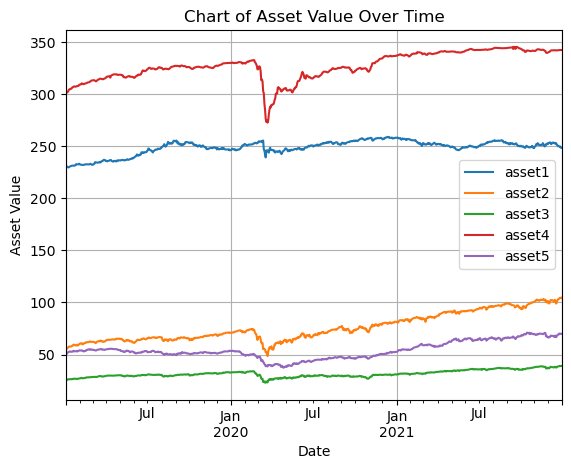

In [298]:
plt.figure(figsize=(20, 30))
df.plot()
plt.title('Chart of Asset Value Over Time')
plt.xlabel('Date')
plt.ylabel('Asset Value')
plt.grid(True)

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [299]:
# Calculate daily percentage returns for each asset
returns = df.pct_change() * 100
returns

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
2021-12-27,-0.091306,0.738415,0.543901,0.000000,1.344319
2021-12-28,0.006442,0.548309,0.759918,0.000000,-0.114106
2021-12-29,-0.486243,-0.158812,-0.664707,0.017523,-0.314151


In [300]:
returns.columns = [(f'return{i + 1}'+'_%') for i in range(len(returns.columns))] #rename the columns to return
returns

,return1_%,return2_%,return3_%,return4_%,return5_%
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
2021-12-27,-0.091306,0.738415,0.543901,0.000000,1.344319
2021-12-28,0.006442,0.548309,0.759918,0.000000,-0.114106
2021-12-29,-0.486243,-0.158812,-0.664707,0.017523,-0.314151


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [301]:
df_assets = df

In [302]:
df1 = pd.concat([df,returns],ignore_index=False, axis=1)


In [303]:
df1

,asset1,asset2,asset3,asset4,asset5,return1_%,return2_%,return3_%,return4_%,return5_%
date,,,,,,,,,,
2019-01-02,231.5061,55.875,25.649222,302.93,50.89,NaN,NaN,NaN,NaN,NaN
2019-01-03,231.0356,54.977,25.503047,302.11,50.41,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,230.4026,56.129,26.147133,301.77,51.38,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,230.0543,56.838,25.955277,302.33,52.14,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,229.7012,56.895,26.137997,303.42,52.13,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,249.9207,103.956,38.820000,342.40,70.11,-0.091306,0.738415,0.543901,0.000000,1.344319
2021-12-28,249.9368,104.526,39.115000,342.40,70.03,0.006442,0.548309,0.759918,0.000000,-0.114106
2021-12-29,248.7215,104.360,38.855000,342.46,69.81,-0.486243,-0.158812,-0.664707,0.017523,-0.314151


In [304]:
df1.corr() # this is checking the pearson correlations which is checking for linearity

,asset1,asset2,asset3,asset4,asset5,return1_%,return2_%,return3_%,return4_%,return5_%
asset1,1.000000,0.506719,0.369571,0.563785,0.071127,0.014129,-0.038337,-0.058229,-0.039471,0.017851
asset2,0.506719,1.000000,0.906099,0.877494,0.830147,-0.037950,0.033240,0.028883,0.018135,0.074403
asset3,0.369571,0.906099,1.000000,0.877432,0.869988,-0.012426,0.044716,0.051653,0.050055,0.062669
asset4,0.563785,0.877494,0.877432,1.000000,0.783916,-0.022833,-0.016700,-0.023659,0.016869,0.055306
asset5,0.071127,0.830147,0.869988,0.783916,1.000000,-0.031145,0.010416,0.026813,-0.002791,0.058752
return1_%,0.014129,-0.037950,-0.012426,-0.022833,-0.031145,1.000000,-0.088341,-0.061253,0.102252,-0.106484
return2_%,-0.038337,0.033240,0.044716,-0.016700,0.010416,-0.088341,1.000000,0.852491,0.526634,0.591399
return3_%,-0.058229,0.028883,0.051653,-0.023659,0.026813,-0.061253,0.852491,1.000000,0.511550,0.557414
return4_%,-0.039471,0.018135,0.050055,0.016869,-0.002791,0.102252,0.526634,0.511550,1.000000,0.421155
return5_%,0.017851,0.074403,0.062669,0.055306,0.058752,-0.106484,0.591399,0.557414,0.421155,1.000000


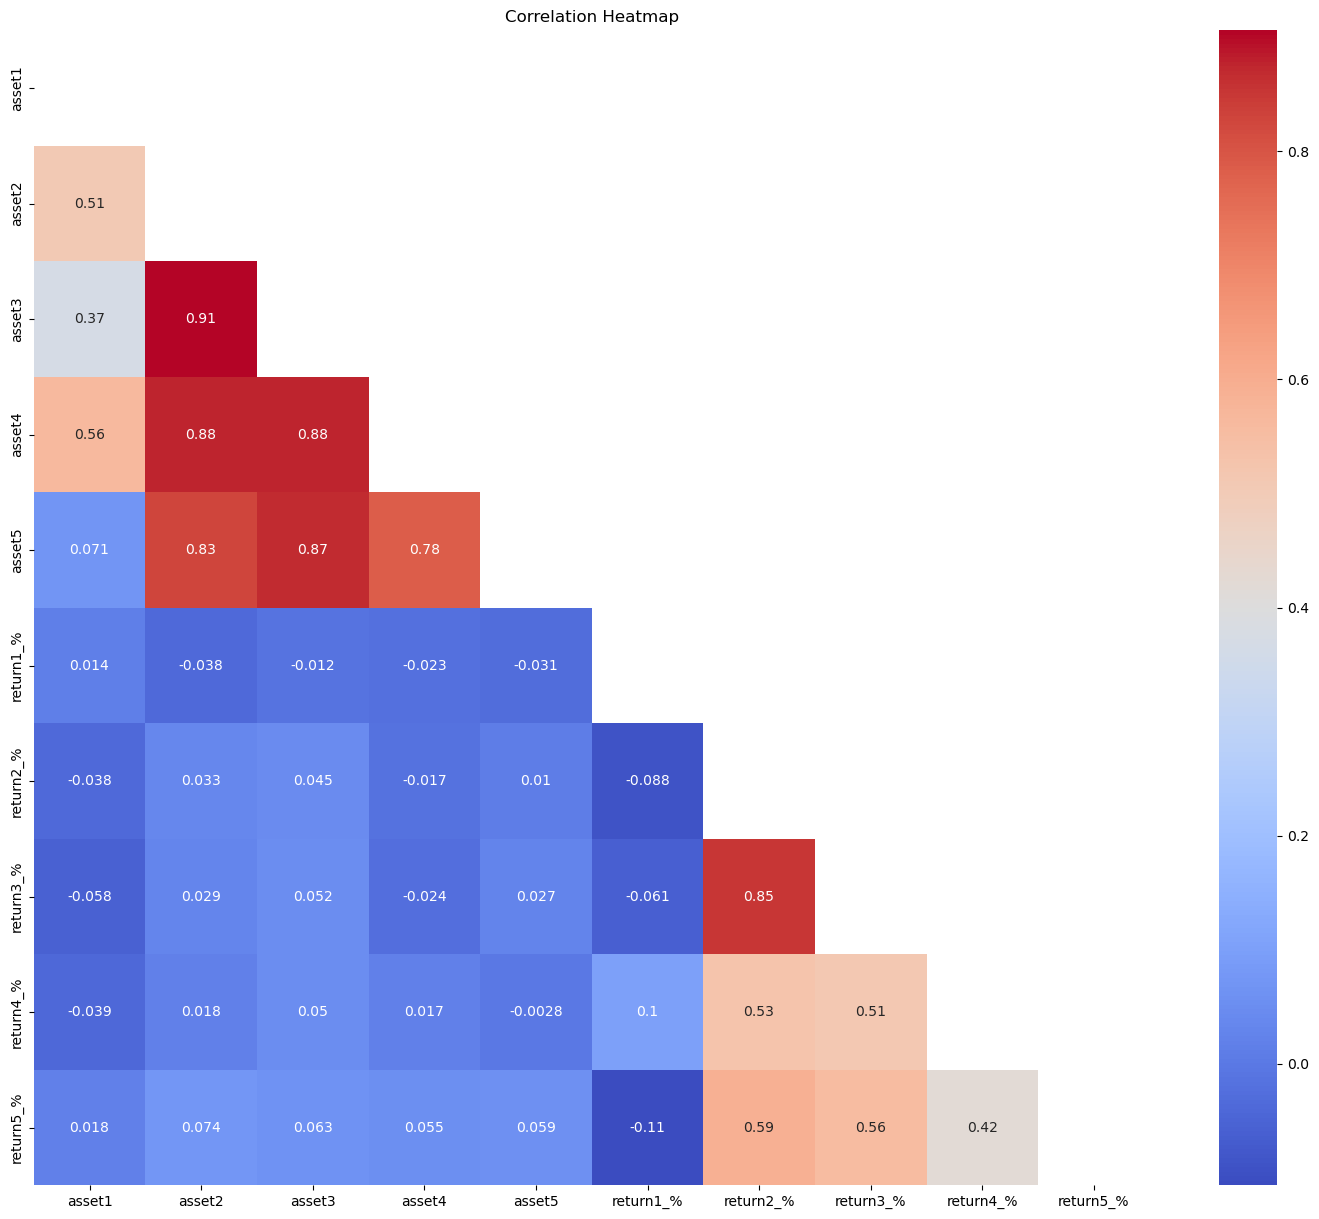

In [305]:
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True #hide repeat half of the matrix

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", mask=mask)

plt.title("Correlation Heatmap")
plt.show()

In [306]:
df1.corr(method='spearman') # this is checking the spearman correlations which is checking for monothonic relationships

,asset1,asset2,asset3,asset4,asset5,return1_%,return2_%,return3_%,return4_%,return5_%
asset1,1.000000,0.566074,0.296299,0.514727,-0.028756,0.035043,-0.023729,-0.055257,-0.038607,0.040518
asset2,0.566074,1.000000,0.853116,0.922239,0.636274,-0.057238,0.028504,-0.001854,-0.085567,0.093120
asset3,0.296299,0.853116,1.000000,0.932501,0.758680,-0.060446,0.013314,0.030746,-0.112138,0.037294
asset4,0.514727,0.922239,0.932501,1.000000,0.727859,-0.068728,-0.028401,-0.019874,-0.119276,0.048866
asset5,-0.028756,0.636274,0.758680,0.727859,1.000000,-0.067396,-0.006609,0.018557,-0.095225,0.049331
return1_%,0.035043,-0.057238,-0.060446,-0.068728,-0.067396,1.000000,-0.116576,-0.073791,0.022416,-0.175041
return2_%,-0.023729,0.028504,0.013314,-0.028401,-0.006609,-0.116576,1.000000,0.769235,0.350084,0.463384
return3_%,-0.055257,-0.001854,0.030746,-0.019874,0.018557,-0.073791,0.769235,1.000000,0.315971,0.381531
return4_%,-0.038607,-0.085567,-0.112138,-0.119276,-0.095225,0.022416,0.350084,0.315971,1.000000,0.243349
return5_%,0.040518,0.093120,0.037294,0.048866,0.049331,-0.175041,0.463384,0.381531,0.243349,1.000000


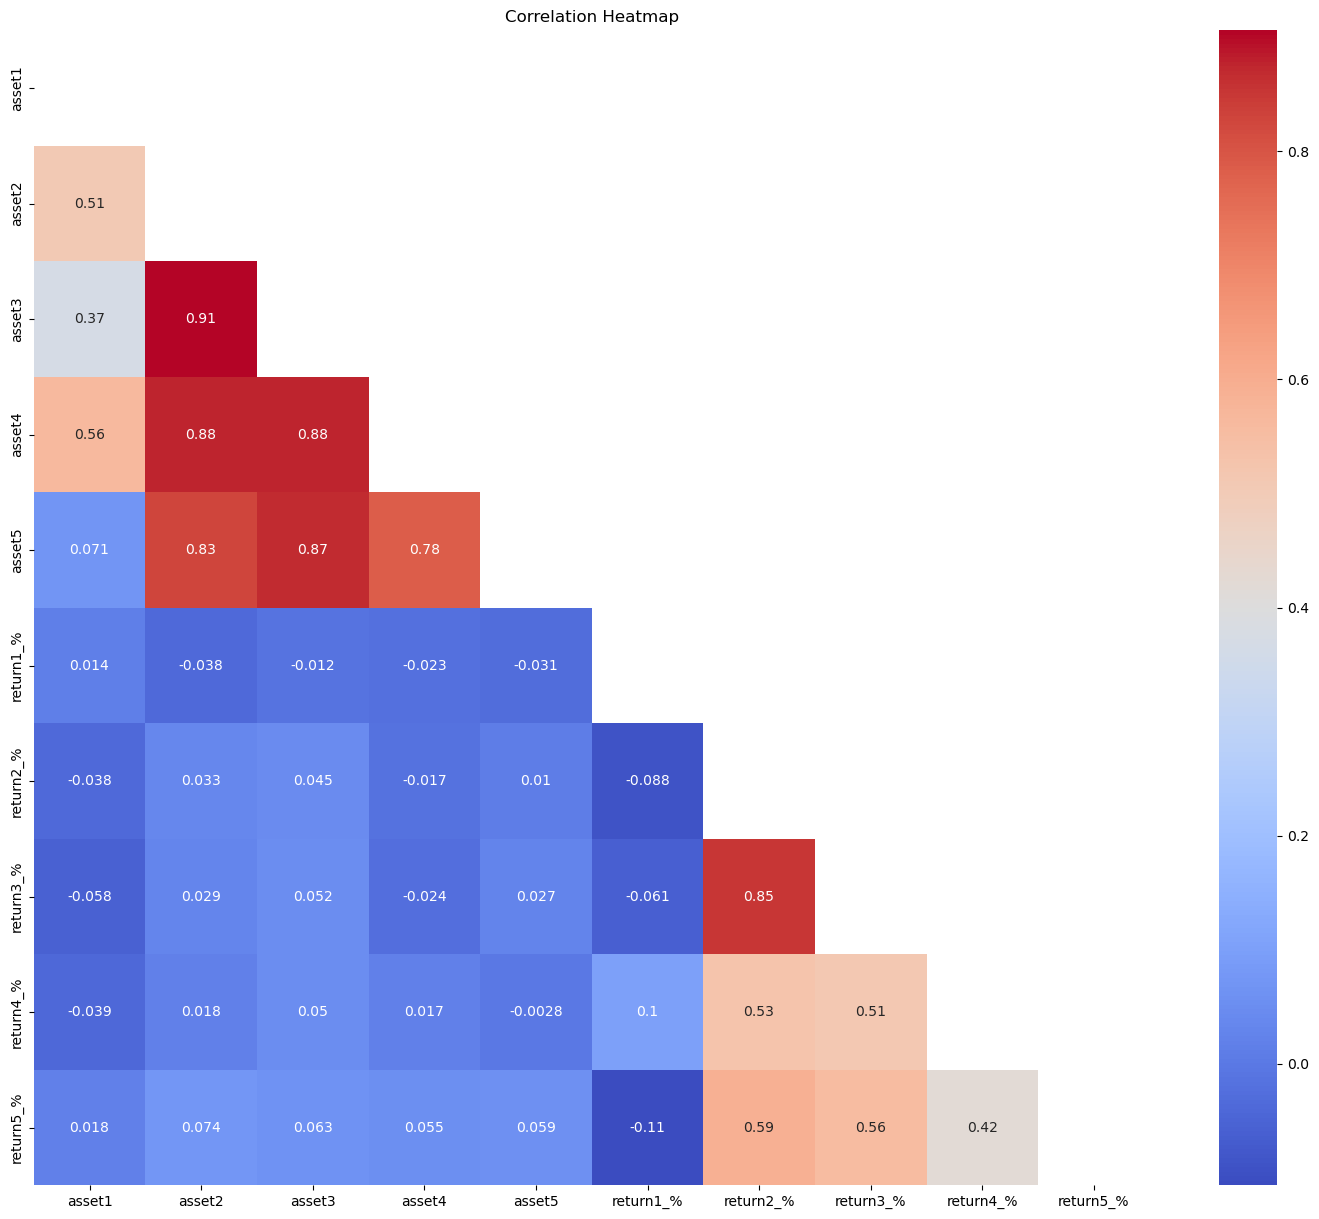

In [307]:
mask = np.zeros_like(df1.corr(method='spearman'))
mask[np.triu_indices_from(mask)] = True #hide repeat half of the matrix

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", mask=mask)

plt.title("Correlation Heatmap")
plt.show()

# Interpreation of Correlations:
### Strong correlation: 
Asset 4 is most strongly correlated with Asset 2(0.88). Next Asset 2 is correlated with Asset 5 (0.83) as well as Asset3 with Asset5(0.87)
### Mild correlation: 
Asset2 with Asset1(0.51) and Asset2(0.56). Return2 with Return5 (0.59) and Return4(0.53) as well as Return3 with Return4(0.51) and Return5(0.56)

There is no difference in the amount of linearity or monotonic relationship. Both are as mild or as strong as mentioned in the text.

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [308]:
df = df1

I picked the returns with the highest mild linear correlation

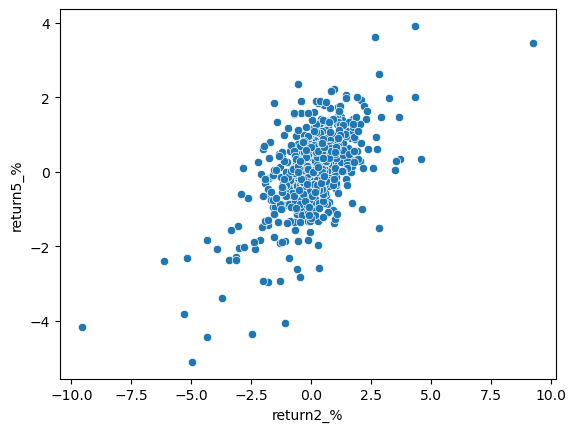

In [309]:
sns.scatterplot(data=df, x='return2_%', y='return5_%')
plt.show()

AS mentioned above, the relationship is mildely monotonic and mildly linear

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [310]:
data2 = pd.read_csv('portfolio_weights.csv')
dfw = data2.copy()
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  783 non-null    float64
 2   Asset2  783 non-null    float64
 3   Asset3  783 non-null    float64
 4   Asset4  783 non-null    float64
 5   Asset5  783 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [311]:
dfw.columns = [column.lower() for column in dfw.columns] #converting to lower case

In [312]:
dfw.isnull().sum() #no NAN values

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [313]:
dfw.duplicated().sum() #no duplications

0

In [314]:
dfw.eq(" ").sum() #no empty strings

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [315]:
dfw["date"] = pd.to_datetime(dfw.date)
dfw = dfw.set_index('date')
dfw.dtypes

asset1    float64
asset2    float64
asset3    float64
asset4    float64
asset5    float64
dtype: object

In [316]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   asset1  783 non-null    float64
 1   asset2  783 non-null    float64
 2   asset3  783 non-null    float64
 3   asset4  783 non-null    float64
 4   asset5  783 non-null    float64
dtypes: float64(5)
memory usage: 36.7 KB


In [317]:
dfw["sum_of_weights"] = dfw.sum(axis=1)
dfw.tail()

,asset1,asset2,asset3,asset4,asset5,sum_of_weights
date,,,,,,
2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
2021-12-31,0.071307,0.266093,0.168775,0.33547,0.158356,1.0


In [318]:
dfw.head()

,asset1,asset2,asset3,asset4,asset5,sum_of_weights
date,,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974,1.0


In [319]:
dfw.sample(5)

,asset1,asset2,asset3,asset4,asset5,sum_of_weights
date,,,,,,
2019-11-19,0.225458,0.116255,0.265003,0.230310,0.162974,1.0
2020-09-18,0.321749,0.127529,0.123941,0.185697,0.241084,1.0
2021-05-04,0.071307,0.266093,0.168775,0.335470,0.158356,1.0
2020-08-21,0.321749,0.127529,0.123941,0.185697,0.241084,1.0
2019-10-10,0.225458,0.116255,0.265003,0.230310,0.162974,1.0


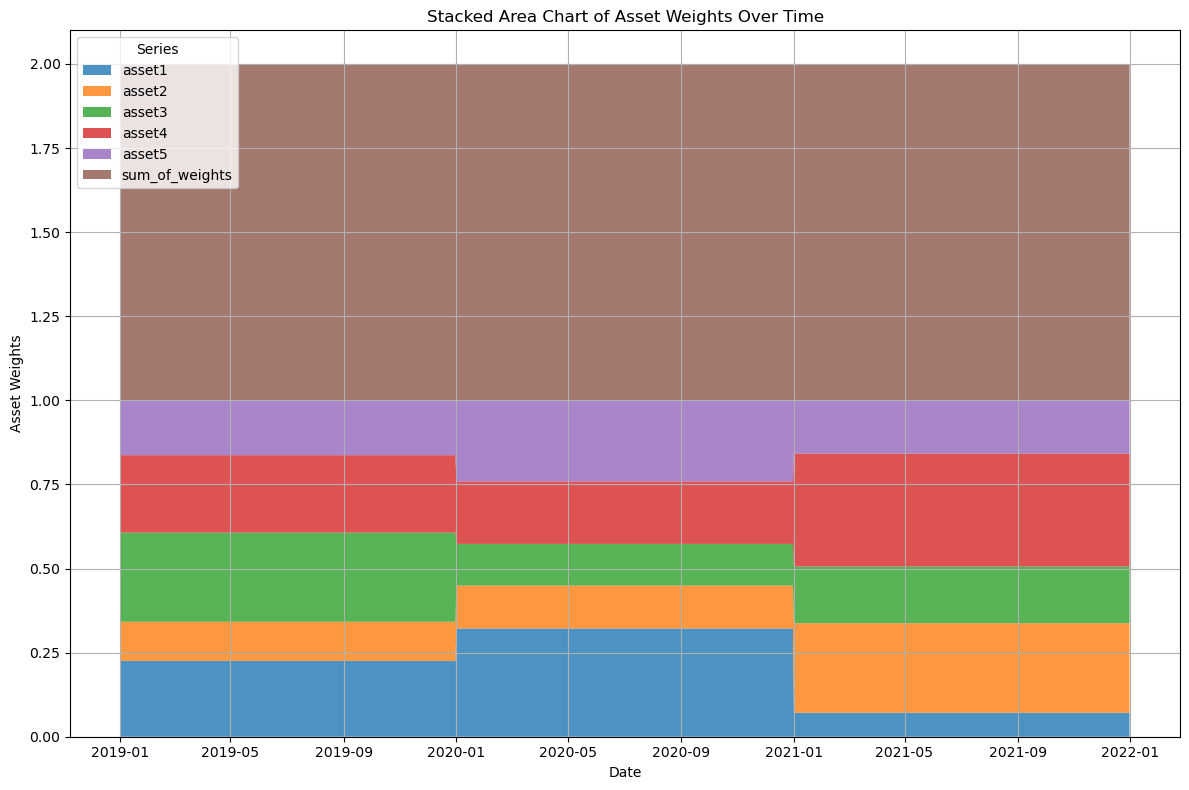

In [320]:
# Plot a stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(dfw.index, dfw.T, labels=dfw.columns, alpha=0.8)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Asset Weights')
plt.title('Stacked Area Chart of Asset Weights Over Time')
plt.legend(title='Series', loc='upper left')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [321]:
returns.head()

,return1_%,return2_%,return3_%,return4_%,return5_%
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179


In [322]:
dfw.head()

,asset1,asset2,asset3,asset4,asset5,sum_of_weights
date,,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974,1.0


In [323]:
dfw = dfw.drop(columns='sum_of_weights')

In [324]:
returns.columns = [(f'asset{i + 1}') for i in range(1,6)] #rename the columns back to ass1-5
returns.head()

,asset2,asset3,asset4,asset5,asset6
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179


In [325]:
returns.shape

(783, 5)

In [326]:
dfw.shape

(783, 5)

In [327]:
df_new = (dfw * returns).sum(axis=1)
df_new.head()

date
2019-01-02    0.000000
2019-01-03   -0.624899
2019-01-04    1.086753
2019-01-07    0.178421
2019-01-08    0.229623
dtype: float64

In [328]:
cum = (1 + df_new).cumprod()

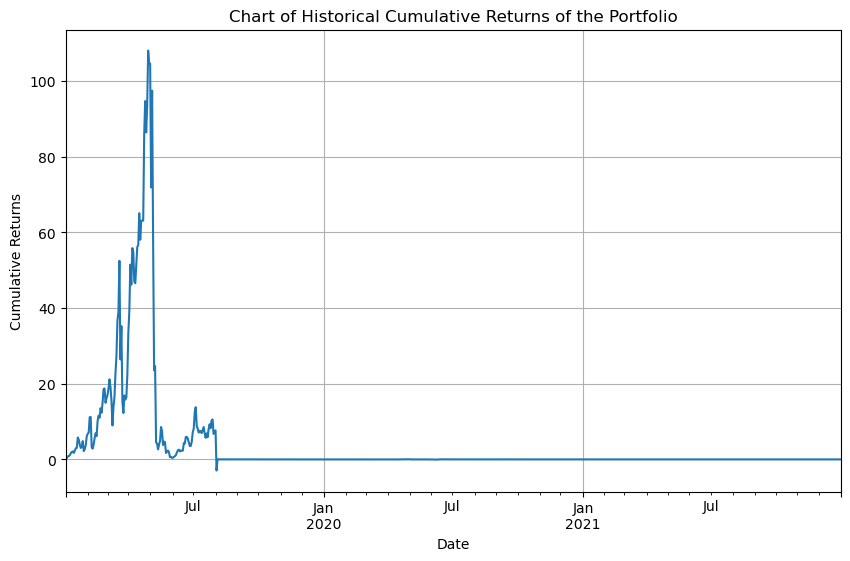

In [329]:
plt.figure(figsize=(10, 6))
cum.plot()
plt.title('Chart of Historical Cumulative Returns of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)



<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [330]:
# distribution of the standard variation

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [331]:
# group by